In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

dimensions de X: (2, 100)
dimensions de y: (1, 100)


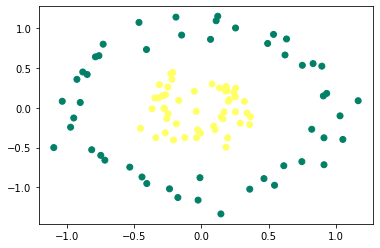

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)
    
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)
    
    return parametres

In [13]:
def forward_propagation(X, parametres):

    activations = {'A0' : X}
    C = len(parametres) // 2
    
    for c in range (1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

In [5]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [17]:
def back_propagation(y, parametres, activations):

    m = y.shape[1]
    C = len(parametres) // 2

    dZ = activations['A' + str(C)] - y
    gradients = {}

    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
          dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

    return gradients

In [7]:
def update(gradients, parametres, learning_rate):
    
    C = len(parametres) // 2
    
    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    
    return parametres

In [8]:
def predict(X, parametres):
      activations = forward_propagation(X, parametres)
      A2 = activations['A2']
      return A2 >= 0.5

In [9]:
from tqdm import tqdm

In [10]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

In [11]:
def neural_network2(X_train, y_train, X_test, y_test, n1, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0_train = X_train.shape[0]
    n2_train = y_train.shape[0]
    n0_test = X_test.shape[0]
    n2_test = y_test.shape[0]
    
    np.random.seed(0)
    parametres_train = initialisation(n0_train, n1, n2_train)
    parametres_test = initialisation(n0_test, n1, n2_test)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    history = []

    for i in tqdm(range(n_iter)):
        
        activations_train = forward_propagation(X_train, parametres_train)
        A2_train = activations_train['A2']
        
        activations_test = forward_propagation(X_test, parametres_test)
        A2_test = activations_test['A2']

        # Plot courbe d'apprentissage
        if i%20 == 0:
            train_loss.append(log_loss(y_train.flatten(), A2_train.flatten()))
            y_pred_train = predict(X_train, parametres_train)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred_train.flatten()))

            test_loss.append(log_loss(y_test.flatten(), A2_test.flatten()))
            y_pred_test = predict(X_test, parametres_test)
            test_acc.append(accuracy_score(y_test.flatten(), y_pred_test.flatten()))

            history.append([parametres_train.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients_train = back_propagation(X_train, y_train, parametres_train, activations_train)
        parametres_train = update(gradients_train, parametres_train, learning_rate)
        
        gradients_test = back_propagation(X_test, y_test, parametres_test, activations_test)
        parametres_test = update(gradients_test, parametres_test, learning_rate)


    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    
    plt.show()

    return parametres

In [18]:
deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

  0%|                                                                                                                                            | 0/3000 [00:00<?, ?it/s]


ValueError: Found input variables with inconsistent numbers of samples: [100, 1600]

In [ ]:
from utilities import *

In [ ]:
X_train, y_train, X_test, y_test = load_data()

y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_test.max()

m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [ ]:
parametres1 = neural_network2(X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate = 0.01, n_iter=8000)